# Exploratory Data Analysis

In [2]:
# Importing Dataset
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Checking Null Values
import seaborn as sns
# sns.heatmap(data.isnull())

In [4]:
# Split
data_x = data.drop(labels = ["label"], axis = 1)
data_y = data["label"]

In [5]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = True)

In [6]:
# Function to view image dataset:

import numpy as np
from matplotlib import pyplot as plt

def view_image(x, y, index, a, b):
    x = x.to_numpy()                    # Plotting image works only on Arrays
    y = y.to_numpy()
    img = np.reshape(x[index], (a,b))   # Image is in a single dimensional array shape ie (a,), Converting it into an 28x28 image Matrix
    plt.imshow(img)
    plt.title(y[index])

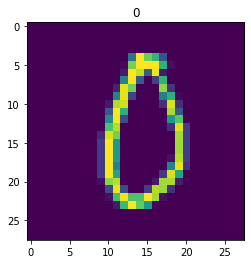

In [7]:
# Checking image data
view_image(data_x, data_y, 69, 28, 28)

In [8]:
# Checking Shope of Dataset
x_train.shape, y_train.shape

((33600, 784), (33600,))

In [9]:
# Converting Dataframes to Array, as we can Reshape Array objects only 
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Reshaping the data to feed into the Model
x_train = x_train.reshape(-1, 28, 28 ,1)      # "1" here means image is GreyScale. IF RGB the value would be "3"
x_test = x_test.reshape(-1, 28, 28 ,1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Checking change of Shape
x_train.shape, y_train.shape

((33600, 28, 28, 1), (33600, 1))

In [10]:
# Normalizing the pixel values of images i.e. Between 0 to 1

x_train = x_train/255
x_test = x_test/255

# Convolution Neural Network Model

In [11]:
# Importing packages
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten

In [12]:
# Initializing Model
model = Sequential()

# Convolution Layer 1 
model.add(Conv2D(filters = 64, kernel_size = 2, activation = "relu", input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2)))

# Flatten
model.add(Flatten())

# Hidden Layer 1
model.add(Dense(units = 10, activation = "sigmoid"))

# Hidden Layer 2 
model.add(Dense(units = 10, activation = "sigmoid"))

# Compiling Model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 10)                108170    
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 108,600
Trainable params: 108,600
Non-trainable params: 0
__________________________________________________

In [13]:
model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1050/1050 [==============================] - 16s 14ms/step - loss: 0.9763 - accuracy: 0.8277
Epoch 2/10
1050/1050 [==============================] - 14s 13ms/step - loss: 0.3783 - accuracy: 0.9363
Epoch 3/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.2224 - accuracy: 0.9556
Epoch 4/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.1574 - accuracy: 0.9656
Epoch 5/10
1050/1050 [==============================] - 15s 15ms/step - loss: 0.1216 - accuracy: 0.9719
Epoch 6/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0986 - accuracy: 0.9766
Epoch 7/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0821 - accuracy: 0.9798
Epoch 8/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0704 - accuracy: 0.9827
Epoch 9/10
1050/1050 [==============================] - 15s 15ms/step - loss: 0.0606 - accuracy: 0.9856
Epoch 10/10
1050/1050 [==============================] - 15s 15m

# Prediction and Accuracy

In [14]:
score = model.evaluate(x_test, y_test)
score

263/263 [==============================] - 2s 5ms/step - loss: 0.1067 - accuracy: 0.9689


[0.10667742788791656, 0.9689285755157471]

In [15]:
print("Accuracy of the CNN Model:", score[1] * 100, "%")

Accuracy of the CNN Model: 96.8928575515747 %
